# Contributing Factors Analysis

## README

### Overview
This notebook analyses various spatial datasets that may contribute to or correlate with nitrogen dioxide (NO₂) pollution levels in Ethiopia (Addis Ababa) and Iraq (Baghdad). It focuses on road infrastructure, points of interest (POIs), and population distribution as potential explanatory variables.

### Objective
The goal is to examine the spatial distribution of key human and infrastructural factors that may influence or correlate with nitrogen dioxide (NO₂) pollution levels in urban areas.

### Workflow

1. **Data Acquisition**
   - Downloads datasets from multiple sources:
     - OpenStreetMap (OSM) for roads, industrial facilities, and POIs for [Ethiopia](https://download.geofabrik.de/africa/ethiopia-latest-free.shp.zip) and [Iraq](https://download.geofabrik.de/asia/iraq-latest-free.shp.zip)
     - [WorldPop](https://data.humdata.org/search?q=Spatial+Distribution+of+Population+&ext_search_source=main-nav) for population density
   - Imports country and city boundary shapefiles for Ethiopia and Iraq.

2. **Data Processing**
   - Clips all spatial layers to city-level boundaries. 
   - Aggregates various indicators into uniform mesh grids for spatial comparison.

3. **Visualisation**
   - Generates static maps of population density and road infrastructure distribution.
   - Visualises spatial variation in contributing factors to support exploratory analysis.

### Outputs

- **Processed Shapefiles**: City-level road, POI, and infrastructure layers.
- **Mesh-Based Aggregated Tables**: Feature counts and densities per grid cell.
- **Static Visualisations**: Choropleth maps for all contributing factors to aid spatial interpretation.
- **Harmonised Datasets**: All outputs aligned spatially and ready for merging with NO₂ concentration data.

## Init: Prepare Packages and Configuration

Get current file/repo/data path in local to make sure the following cells run properly.

In [2]:
# -----------------------------------------------------------------------------
# STANDARD PATH INITIALISATION (borrowed from Notebook 1)
# -----------------------------------------------------------------------------
# ! pip install pandas osmnx geopandas osm2geojson requests urllib3 shapely matplotlib rasterstats numpy rasterio pyarrow
from pathlib import Path
import sys
import geopandas as gpd

CURR_PATH = Path().resolve()            # current file path
REPO_PATH = CURR_PATH.parent            # current repository path
DATA_PATH = REPO_PATH / "data"          # path for saving the data
DEMO_PATH = DATA_PATH / "demo-data"     # path for demo purpose 

SRC_PATH = REPO_PATH / "src"    # path for other sources
sys.path.append(str(SRC_PATH))  # add src to system path to import custom functions

# -----------------------------------------------------------------------------
# IMPORT OSM‐ENRICHMENT AND VISUALISATION HELPERS
# -----------------------------------------------------------------------------
from osmstats import batch_write
#from visualization import plot_mesh_static
from visualization import plot_mesh

# Import customised scripts
from aggregation import*
from missingvalue import*
from visualization import*
from osmstats import*
from helpercollections import*

## 0 Methodology Data Process Pipeline

This chapter processes the contributing factors through the following steps:

- **(1) Filling Missing Value**: Spot the missing values in raster and replenish them using iterative checking, using **mean** of the neighbour raster as the replenish value.

- **(2) Clipping to Region**: Clipping the data to the interested area, and output the filled raster.

- **(3) Aggregation**: Import the generated mesh and aggregate the raster to the mesh level.

## 1 OSM Data

This chapter is used to enrich spatial mesh grids with OpenStreetMap (OSM) data and visualise selected indicators such as POI density, road length, and land-use area.

Note:

* A predefined set of eight POI types (e.g., supermarket, hospital) and six land-use classes (e.g., industrial, residential) are used to filter relevant OSM content.

* OSM enrichment is performed at the mesh level using a batch processing pipeline, resulting in hundreds of `.gpkg` files for each day.

* Static maps are generated to visualise aggregated metrics such as POI share, road length, and industrial land area in square metres.

* These outputs provide spatial insight into the built environment and urban function of regions like Addis Ababa.


#### Ethiopia - Addis Ababa

Define static OSM parameters

In [ ]:
# Eight relevant POIs
relevant_poi = [
    "supermarket",
    "hospital",
    "car_dealership",
    "car_rental",
    "car_wash",
    "marketplace",
    "mall",
    "university"
]

# Land‐use categories of interest
landuse_classes = [
    "industrial",
    "commercial",
    "residential",
    "retail",
    "farmland",
    "farmyard"
]

Paths for Addis Ababa

In [ ]:
addis_mesh_in  = DATA_PATH / "addis-empty-mesh-data"
addis_mesh_out = DATA_PATH / "addis-OSM-mesh-data"
addis_osm      = DATA_PATH / "OSM" / "ethiopia-latest-free.shp"

Enrich Addis Ababa — writes ~730 files to addis-OSM-mesh-data

In [ ]:
batch_write(
    city="addis",
    mesh_folder_in=addis_mesh_in,
    mesh_folder_out=addis_mesh_out,
    osm_shapefile=addis_osm,
    relevant_poi=relevant_poi,
    landuse_classes=landuse_classes
)

Cell “Plot the 2023-01-01 Demo Mesh for QA”

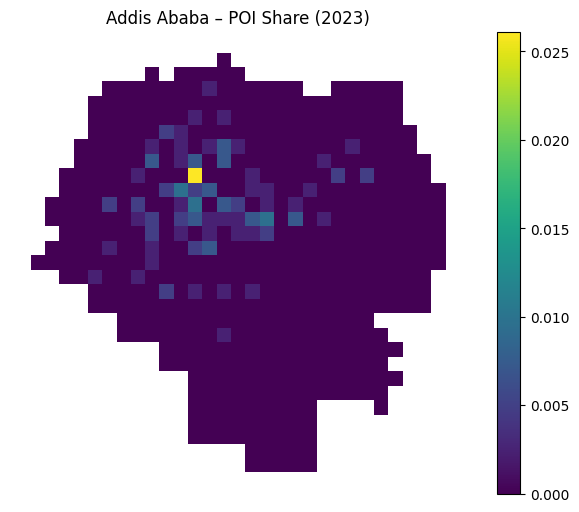

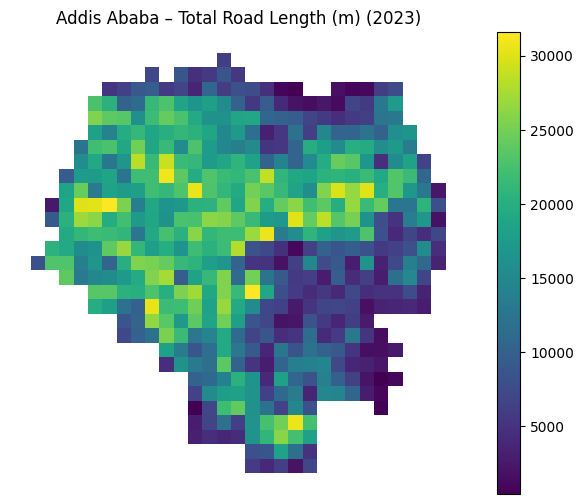

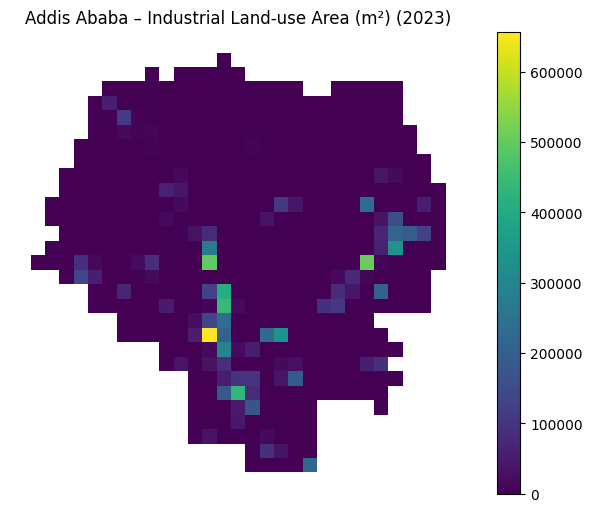

<Axes: title={'center': 'Addis Ababa – Industrial Land‐use Area (m²) (2023)'}>

In [2]:
demo_dir = DATA_PATH / "demo-data"
#  → “addis-2023-01-01.gpkg” and “baghdad-2023-01-01.gpkg” now exist

# Load the single Addis mesh
gdf_addis = gpd.read_file(demo_dir / "addis-ababa-2023-01-01.gpkg")

# POI Share (this should already work)

plot_mesh(
    mesh    = gdf_addis,
    feature = "poi_share",
    title   = "Addis Ababa – POI Share (2023)",
    figsize = (8, 6),
    show    = True,
    cmap    = "viridis",
    show_edges=False
)

# Road Length (this also should work)
plot_mesh(
    mesh    = gdf_addis,
    feature = "road_len",
    title   = "Addis Ababa – Total Road Length (m) (2023)",
    figsize = (8, 6),
    show    = True,
    cmap    = "viridis",
    show_edges=False
)

# Industrial Land‐use Area (now guaranteed to exist)
plot_mesh(
    mesh    = gdf_addis,
    feature = "lu_industrial_area",
    title   = "Addis Ababa – Industrial Land‐use Area (m²) (2023)",
    figsize = (8, 6),
    show    = True,
    cmap    = "viridis",
    show_edges=False
)

#### Iraq - Baghdad

Paths for Baghdad

In [3]:
# -----------------------------------------------------------------------------
# PATHS FOR BAGHDAD
# -----------------------------------------------------------------------------
baghdad_mesh_in  = DATA_PATH / "baghdad-empty-mesh-data"
baghdad_mesh_out = DATA_PATH / "baghdad-OSM-mesh-data"
baghdad_osm      = DATA_PATH / "OSM" / "iraq-latest-free.shp"

Enrich Baghdad — writes ~730 files to baghdad-OSM-mesh-data

In [ ]:
batch_write(
    city="baghdad",
    mesh_folder_in=baghdad_mesh_in,
    mesh_folder_out=baghdad_mesh_out,
    osm_shapefile=baghdad_osm,
    relevant_poi=relevant_poi,
    landuse_classes=landuse_classes
)

Plot demo mesh for 2023 (already written in `data/demo-data`)

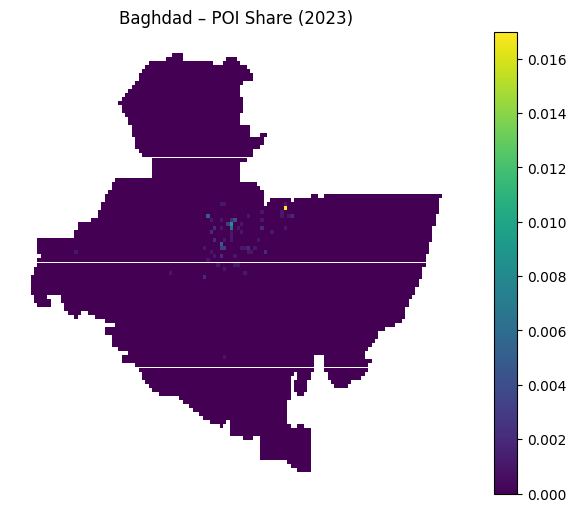

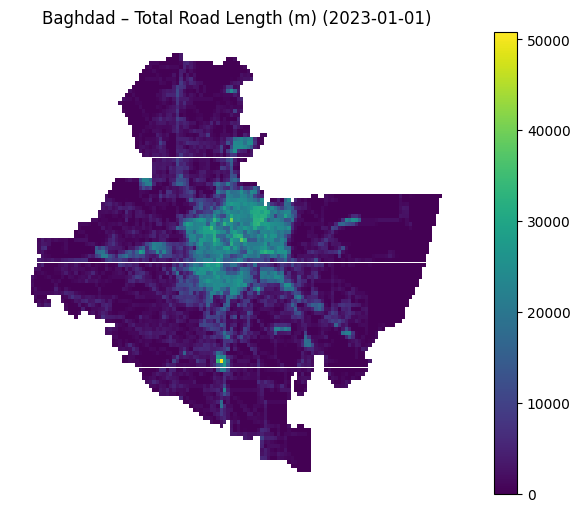

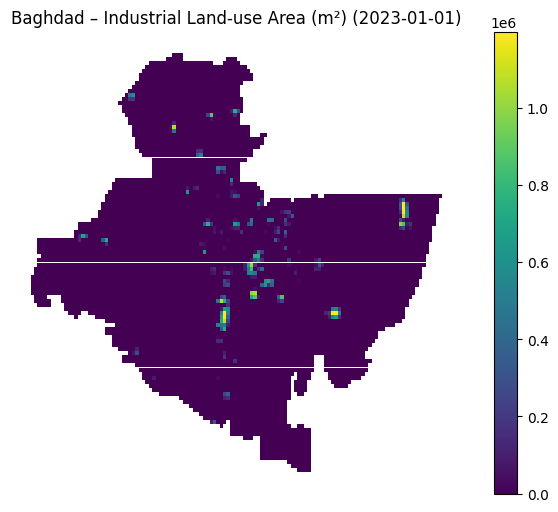

<Axes: title={'center': 'Baghdad – Industrial Land-use Area (m²) (2023-01-01)'}>

In [4]:
# Load the single Baghdad mesh
gdf_bag = gpd.read_file(demo_dir / "baghdad-2023-01-01.gpkg")

# POI Share
plot_mesh(
    mesh    = gdf_bag,
    feature = "poi_share",
    title   = "Baghdad – POI Share (2023)",
    figsize = (8, 6),
    show    = True, 
    cmap    = "viridis",
    show_edges=False
)

# Road Length
plot_mesh(
    mesh    = gdf_bag,
    feature = "road_len",
    title   = "Baghdad – Total Road Length (m) (2023-01-01)",
    figsize = (8, 6),
    show    = True, 
    cmap    = "viridis",
    show_edges=False
)

# Industrial Land-use Area
plot_mesh(
    mesh    = gdf_bag,
    feature = "lu_industrial_area",
    title   = "Baghdad – Industrial Land-use Area (m²) (2023-01-01)",
    figsize = (8, 6),
    show    = True, 
    cmap    = "viridis",
    show_edges=False
)

## 2 Population Data

This chapter is used to aggregate and visualise population distribution in different regions using mesh grids.

Note:

* The population data is aggregated based on predefined hexagonal or square mesh grids using zonal statistics.

* Yearly aggregated population values are stored as `.gpkg` files, with one file for each day to support temporal analysis.

* Static maps are generated to visualise the spatial distribution of population across the mesh in each year.

* The workflow supports comparison across multiple years (e.g., 2023 and 2024), enabling temporal change analysis.

In [3]:
# ------------------------------------------------------------------------------
# INITIALISE MESH PATHS AND READ GPKG LAYERS
# ------------------------------------------------------------------------------

addis_meshes_path = DATA_PATH / 'addis-mesh-data'       # path to folder storing Addis mesh files
baghdad_meshes_path = DATA_PATH / 'baghdad-mesh-data'   # path to folder storing Baghdad mesh files

mesh_addis = DATA_PATH / "mesh-grid" / "grid_addis_ababa.gpkg"     # full path to Addis Ababa mesh grid file
mesh_baghdad = DATA_PATH / "mesh-grid" / "grid_baghdad.gpkg"       # full path to Baghdad mesh grid file

lyr_addis_name = fiona.listlayers(mesh_addis)[0]        # extract the only layer name in the Addis GPKG
lyr_baghdad_name = fiona.listlayers(mesh_baghdad)[0]    # extract the only layer name in the Baghdad GPKG

#### Ethiopia - Addis Ababa

In [4]:
output_root = DATA_PATH / "eth-pop-gpkg"          # path for saving the data
eth_pop_path = DATA_PATH / 'eth-pop'

aggregate_pop_data(
    data_tiff_path=eth_pop_path,
    mesh_path=mesh_addis,
    layer_name=lyr_addis_name,
    agg_type="sum",
    feature_col="pop_sum_m",
    output_path=output_root
)

Currently working on: 1/2, Year: 2023
Saved: C:\Users\26454\OneDrive - Imperial College London\Documents\GitHub\air-pollution-mobility-research-project\data\eth-pop-gpkg\pop_aggregated_2023.gpkg
Currently working on: 2/2, Year: 2024
Saved: C:\Users\26454\OneDrive - Imperial College London\Documents\GitHub\air-pollution-mobility-research-project\data\eth-pop-gpkg\pop_aggregated_2024.gpkg


In [ ]:
# Filter for .gpkg files that contain "2023" in the filename
gpkg_files_2023_eth = [f for f in addis_meshes_path.glob("*.gpkg") if "2023" in f.name]
print(f"There are {len(gpkg_files_2023_eth)} files from the year 2023.")

# Filter for .gpkg files that contain "2023" in the filename
gpkg_files_2024_eth = [f for f in addis_meshes_path.glob("*.gpkg") if "2024" in f.name]
print(f"There are {len(gpkg_files_2024_eth)} files from the year 2024.")

There are 365 files from the year 2023.
There are 366 files from the year 2024.


In [ ]:
# Input file paths
src_2023_eth = DATA_PATH / "eth-pop-gpkg" / "pop_aggregated_2023.gpkg"
src_2024_eth = DATA_PATH / "eth-pop-gpkg" / "pop_aggregated_2024.gpkg"

# Output directory 
output_path = DATA_PATH

# Run for 2023 and 2024
generate_daily_files(src_2023_eth, 2023, 365, "addis-ababa", output_path)
generate_daily_files(src_2024_eth, 2024, 366, "addis-ababa", output_path)

Done: 365 files created for 2023.
Done: 366 files created for 2024.


**Visualisation**

Show aggregated result in 2023 and 2024 for Addis Ababa.

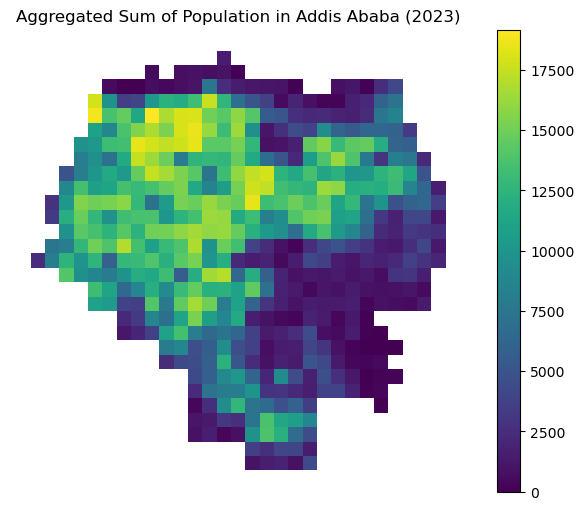

In [7]:
pop_2023_eth = gpd.read_file(DATA_PATH / "pop-files-addis-ababa" / "addis-ababa-2023-02-21.gpkg")
plot_mesh(mesh=pop_2023_eth, feature="pop_sum_m", title="Aggregated Sum of Population in Addis Ababa (2023)", show_edges=False)
plt.show()

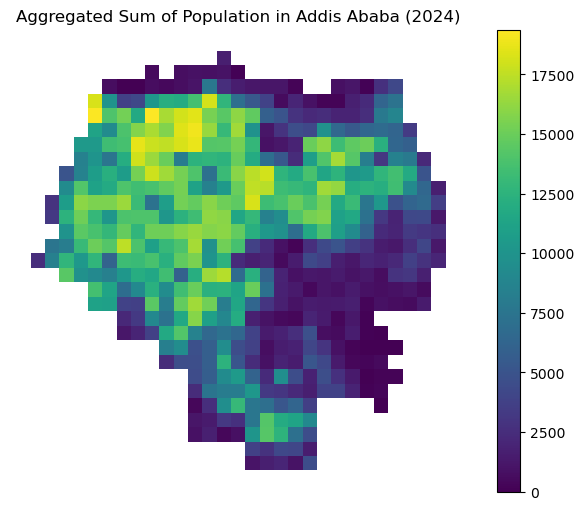

In [8]:
pop_2024_eth = gpd.read_file(DATA_PATH / "pop-files-addis-ababa" / "addis-ababa-2024-02-21.gpkg")
plot_mesh(mesh=pop_2024_eth, feature="pop_sum_m", title="Aggregated Sum of Population in Addis Ababa (2024)", show_edges=False)
plt.show()

#### Iraq - Baghdad

In [9]:
output_root = DATA_PATH / "iraq-pop-gpkg"          # path for saving the data
iraq_pop_path = DATA_PATH / 'iraq-pop'

aggregate_pop_data(
    data_tiff_path=iraq_pop_path,
    mesh_path=mesh_baghdad,
    layer_name=lyr_baghdad_name,
    agg_type="sum",
    feature_col="pop_sum_m",
    output_path=output_root
)

Currently working on: 1/2, Year: 2023
Saved: C:\Users\26454\OneDrive - Imperial College London\Documents\GitHub\air-pollution-mobility-research-project\data\iraq-pop-gpkg\pop_aggregated_2023.gpkg
Currently working on: 2/2, Year: 2024
Saved: C:\Users\26454\OneDrive - Imperial College London\Documents\GitHub\air-pollution-mobility-research-project\data\iraq-pop-gpkg\pop_aggregated_2024.gpkg


In [10]:
# Filter for .gpkg files that contain "2023" in the filename
gpkg_files_2023_iraq = [f for f in baghdad_meshes_path.glob("*.gpkg") if "2023" in f.name]
print(f"There are {len(gpkg_files_2023_iraq)} files from the year 2023.")

# Filter for .gpkg files that contain "2023" in the filename
gpkg_files_2024_iraq = [f for f in baghdad_meshes_path.glob("*.gpkg") if "2024" in f.name]
print(f"There are {len(gpkg_files_2024_iraq)} files from the year 2024.")

There are 365 files from the year 2023.
There are 366 files from the year 2024.


In [11]:
# Input file paths
src_2023_iraq = DATA_PATH / "iraq-pop-gpkg" / "pop_aggregated_2023.gpkg"
src_2024_iraq = DATA_PATH / "iraq-pop-gpkg" / "pop_aggregated_2024.gpkg"

# Output directory 
output_path = DATA_PATH 

# Run for 2023 and 2024
generate_daily_files(src_2023_iraq, 2023, 365, "baghdad", output_path)
generate_daily_files(src_2024_iraq, 2024, 366, "baghdad", output_path)

Done: 365 files created for 2023.
Done: 366 files created for 2024.


**Visualisation**

Show aggregated result in 2023 and 2024 for Baghdad.

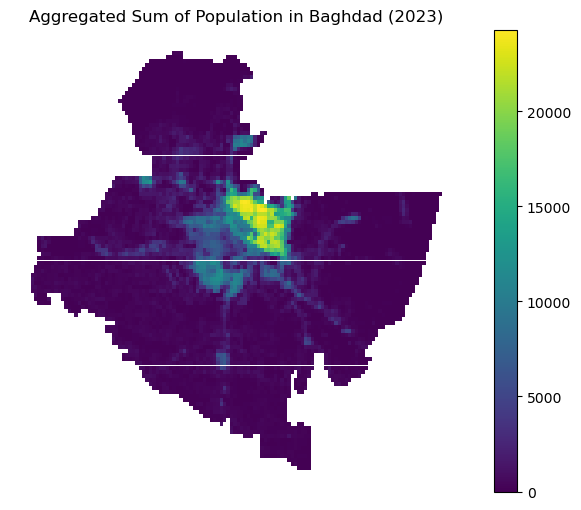

In [12]:
pop_2023_iraq = gpd.read_file(DATA_PATH / "pop-files-baghdad" / "baghdad-2023-02-21.gpkg")
plot_mesh(mesh=pop_2023_iraq, feature="pop_sum_m", title="Aggregated Sum of Population in Baghdad (2023)", show_edges=False)
plt.show()

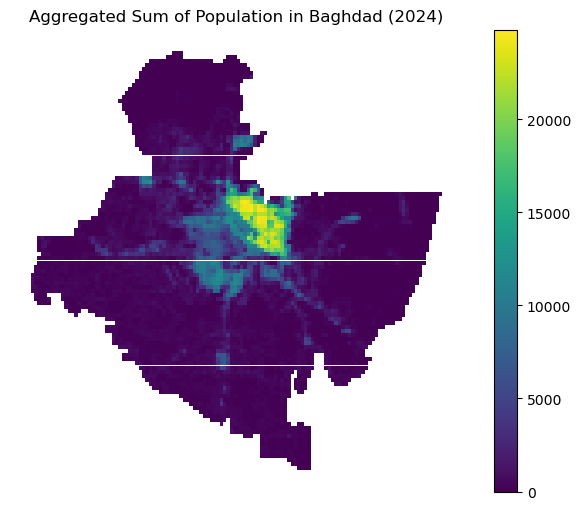

In [13]:
pop_2024_iraq = gpd.read_file(DATA_PATH / "pop-files-baghdad" / "baghdad-2024-02-21.gpkg")
plot_mesh(mesh=pop_2024_iraq, feature="pop_sum_m", title="Aggregated Sum of Population in Baghdad (2024)", show_edges=False)
plt.show()

## 3 Night Time Light

In [13]:
import rasterio
from aggregation import*

output_path = DATA_PATH
addis_meshes_path = DATA_PATH / 'addis-mesh-data'
baghdad_meshes_path = DATA_PATH / 'baghdad-mesh-data'

mesh_addis = DATA_PATH / "mesh-grid" / "grid_addis_ababa.gpkg"
mesh_baghdad = DATA_PATH / "mesh-grid" / "grid_baghdad.gpkg"

lyr_addis_name = fiona.listlayers(mesh_addis)[0]         # control layer number = 1 
lyr_baghdad_name = fiona.listlayers(mesh_baghdad)[0]

#### Ethiopia - Addis Ababa

Clip the raster to interested area.

In [ ]:
min_lon, max_lon = 38.65, 39.05
min_lat, max_lat = 8.8, 9.1

addis_ntl_tiff = DATA_PATH / "addis-ababa-NTL-tiffs"
clip_tiff_by_bbox('addis-ababa', addis_ntl_tiff, output_path,
                      min_lon, min_lat, max_lon, max_lat,)

Fill the missing data in the raster.

In [ ]:
addis_ntl_clipped = DATA_PATH / "addis-ababa-NTL-clipped"

fill_ntl_missing_data(
    city = 'addis-ababa',
    data_tiff_path = addis_ntl_clipped,
    output_path = DATA_PATH,
)

Generate TIFF Animation

Scanning percentiles: 100%|██████████| 731/731 [00:06<00:00, 110.52it/s]


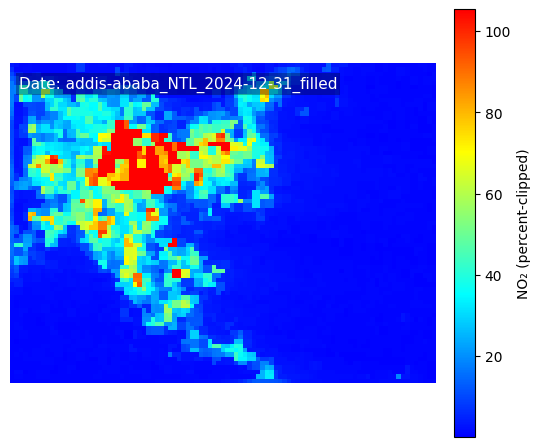

Animation saved to: D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\data\animation-output\addis-ababa-NTL-animation.gif


In [11]:
addis_ntl_tif_dir = DATA_PATH / 'addis-ababa-NTL-filled'  
tiff_2_gif(addis_ntl_tif_dir, output_path=DATA_PATH, output_name="addis-ababa-NTL-animation", fps = 8)

Aggregate to Mesh

In [ ]:
# Aggregate Ethiopia - Addis Ababa
addis_ntl_tif_dir = DATA_PATH / 'baghdad-NTL-filled'  
aggregate_data(
    data_tiff_path=addis_ntl_tif_dir, 
    mesh_path=baghdad_meshes_path, 
    layer_name=lyr_baghdad_name,
    feature_name="NTL_mean"
    )

#### Iraq - Baghdad

Clip the raster to interested area.

In [ ]:
min_lon, max_lon = 43.7, 45.0
min_lat, max_lat = 32.7, 33.8

baghdad_ntl_tiff = DATA_PATH / "baghdad-NTL-tiffs"
clip_tiff_by_bbox('baghdad', baghdad_ntl_tiff, output_path,
                      min_lon, min_lat, max_lon, max_lat,)

Fill the missing data in the raster.

In [ ]:
baghdad_ntl_clipped = DATA_PATH / "baghdad-NTL-clipped"

fill_ntl_missing_data(
    city = 'baghdad',
    data_tiff_path = baghdad_ntl_clipped,
    output_path = DATA_PATH,
)

Generate TIFF Animation

Scanning percentiles: 100%|██████████| 701/701 [00:07<00:00, 88.71it/s]


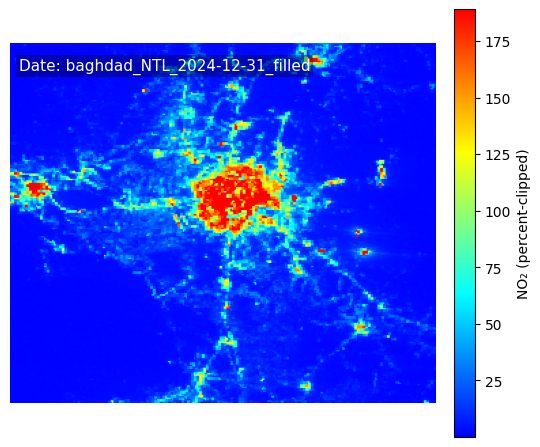

Animation saved to: D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\data\animation-output\baghdad-NTL-animation.gif


In [ ]:
baghdad_ntl_tif_dir = DATA_PATH / 'baghdad-NTL-filled'  
tiff_2_gif(baghdad_ntl_tif_dir, output_path=DATA_PATH, output_name="baghdad-NTL-animation", fps = 8)

Aggregate to Mesh

In [ ]:
# Aggregate Ethiopia - Addis Ababa
baghdad_ntl_tif_dir = DATA_PATH / 'baghdad-NTL-filled'  
aggregate_data(
    data_tiff_path=baghdad_ntl_tif_dir, 
    mesh_path=baghdad_meshes_path, 
    layer_name=lyr_baghdad_name,
    feature_name="NTL_mean"
    )